In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from numpy import math
from statsmodels.graphics.regressionplots import influence_plot

In [42]:
data = pd.read_csv(r"C:\Users\user\Downloads\ToyotaCorolla (2).csv" , encoding = 'latin - 1')

In [43]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [45]:
data.shape

(1436, 38)

In [46]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [47]:
df = pd.get_dummies(data )

In [48]:
df.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,...,0,0,1,0,0,0,0,0,0,0
1,2,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90,1,0,2000,...,0,0,1,0,0,0,0,0,0,0
3,4,14950,26,7,2002,48000,90,0,0,2000,...,0,1,0,0,0,0,0,0,0,0
4,5,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,0,0,0,0,0,0,0


In [49]:
dependent_variable = 'Price'

In [50]:
independent_variable = df.columns.tolist()

In [51]:
independent_variable.remove(dependent_variable)

In [52]:
independent_variable

['Id',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar',
 'Model_TOYOTA Corolla ',
 'Model_TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors',
 'Model_TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors',
 'Model_TOYOTA Corolla 1.3 16V 2/3-Doors',
 'Model_TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors',
 'Model_TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors',
 'Model_TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors',
 'Model_TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-Doors',
 'Model_TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors',
 'Model_TOYO

In [53]:
## create the data of independent variable

x = df[independent_variable].values


## create for a dependent variable

y = df[dependent_variable].values

In [54]:
## splitting datasets into the training and testing

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [55]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
x_train

array([[0.42470507, 0.83544304, 0.09090909, ..., 0.        , 0.        ,
        0.        ],
       [0.35600278, 0.63291139, 0.45454545, ..., 0.        , 0.        ,
        0.        ],
       [0.61138099, 0.74683544, 0.72727273, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.84802221, 0.87341772, 0.90909091, ..., 0.        , 0.        ,
        0.        ],
       [0.39000694, 0.62025316, 0.54545455, ..., 0.        , 0.        ,
        0.        ],
       [0.47675226, 0.84810127, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,409,410,411,412,413,414,415,416,417,418
0,0.424705,0.835443,0.090909,0.166667,0.750548,0.024390,0.0,0.0,1.000000,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.356003,0.632911,0.454545,0.333333,0.229275,0.333333,1.0,0.0,0.428571,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.611381,0.746835,0.727273,0.166667,0.266061,0.138211,1.0,0.0,0.000000,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.668286,0.822785,0.181818,0.166667,0.218104,0.138211,0.0,0.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.210965,0.481013,0.454545,0.500000,0.169671,0.227642,1.0,0.0,0.140000,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
## Fitting multiple linear regression to the training sets

regressor = LinearRegression()
reg = regressor.fit(x_train , y_train)


In [59]:
reg

LinearRegression()

In [60]:
## predicting the test set results

y_pred = regressor.predict(x_test)

In [61]:
y_pred

array([ 8.78400000e+03,  1.07680000e+04,  1.38880000e+04,  7.71200000e+03,
        9.81600000e+03,  9.67200000e+03,  6.59200000e+03,  1.55040000e+04,
        1.20160000e+04,  1.04560000e+04,  6.22400000e+03,  1.03600000e+04,
        1.29040000e+04,  9.20800000e+03,  7.56800000e+03,  1.45440000e+04,
        1.14000000e+04,  7.85600000e+03,  1.18720000e+04,  9.51200000e+03,
        6.78400000e+03,  7.20000000e+03,  1.19280000e+04,  1.20000000e+04,
        2.11040000e+04, -1.41129925e+16,  1.30960000e+04,  6.67200000e+03,
        9.48800000e+03, -1.46243057e+15,  1.10240000e+04,  8.41600000e+03,
        1.53520000e+04,  7.37600000e+03,  9.85600000e+03,  1.32960000e+04,
        9.28000000e+03,  1.23600000e+04,  1.00320000e+04,  8.70400000e+03,
        8.48000000e+03,  9.74400000e+03,  1.05280000e+04,  1.06239372e+15,
        9.85600000e+03,  7.26400000e+03,  1.04560000e+04,  7.80800000e+03,
        8.12000000e+03,  8.44800000e+03,  1.87200000e+04,  2.57225043e+15,
        7.42400000e+03,  

In [62]:
pd.DataFrame(y_pred).head()

,0
0,8784.0
1,10768.0
2,13888.0
3,7712.0
4,9816.0


In [69]:
math.sqrt(mean_squared_error(y_test , y_pred))

5015625461506209.0

In [70]:
import statsmodels.formula.api as smf

In [71]:
model = smf.ols("y~x"  , data = df).fit().rsquared

In [72]:
model

0.9631779115407708

In [77]:
import matplotlib.pyplot as plt

In [88]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

Text(0, 0.5, 'cooks Distance')

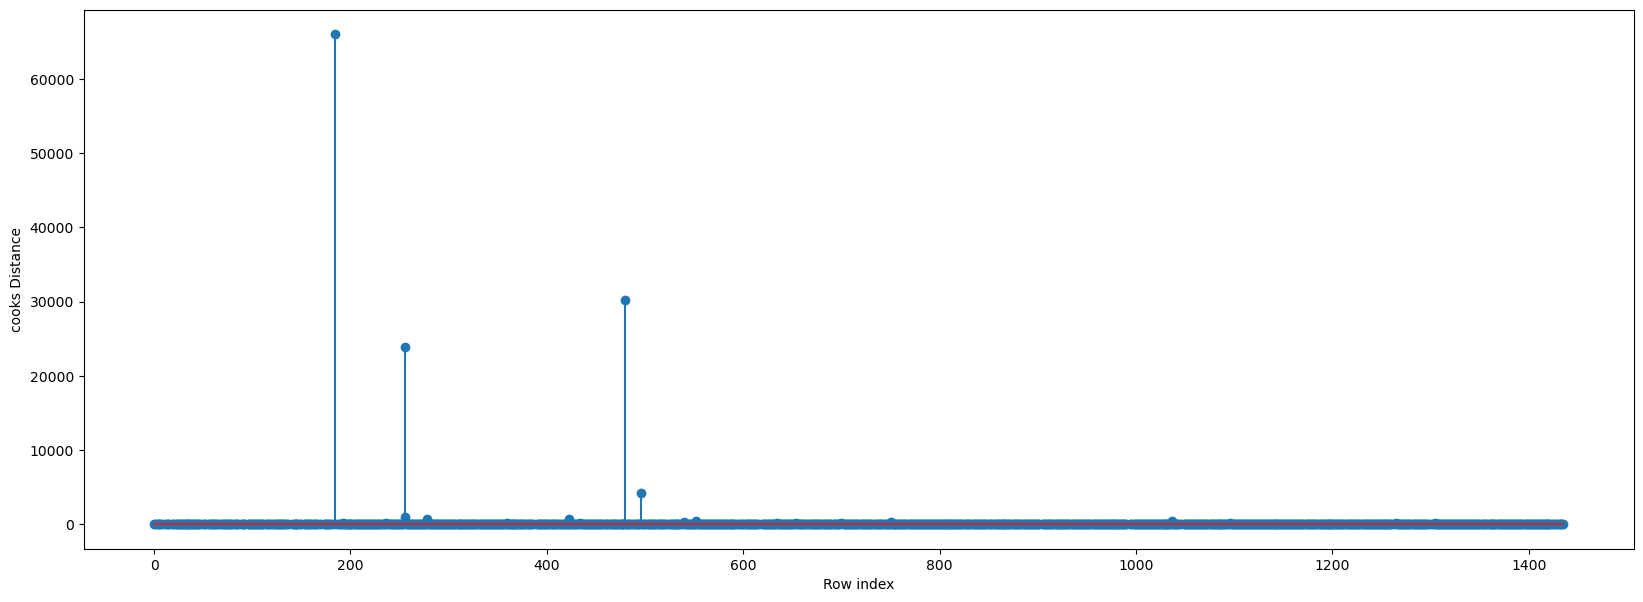

In [89]:
fig = plt.subplots(figsize = (20 , 7))
plt.stem(np.arange(len(df)),np.round(c , 3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')

In [73]:
model1 = smf.ols("y~x" , data = df).fit()

In [74]:
model1

In [29]:
import seaborn as sn

<Axes: xlabel='KM', ylabel='Price'>

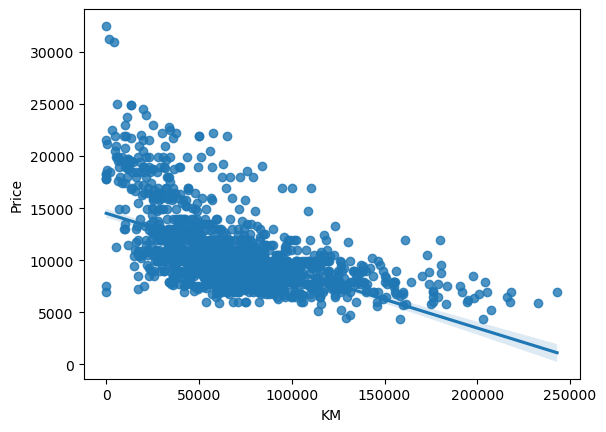

In [31]:
sn.regplot(x = 'KM' , y = 'Price' ,data = df)

C:\Users\user\AppData\Local\Temp\ipykernel_2800\135566372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(y)


<Axes: ylabel='Density'>

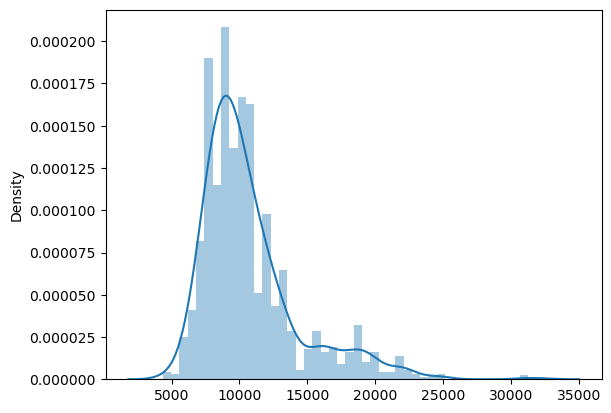

In [32]:
sn.distplot(y)

In [53]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     65.62
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:41:45   Log-Likelihood:                -11436.
No. Observations:                1436   AIC:                         2.369e+04
Df Residuals:                    1026   BIC:                         2.585e+04
Df Model:                         409                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0037      0.007     -0.545      0.586      -0.017       0.010
x[0]          -0.4535      0.298     -1.522      0.128      -1.038       0.131
x[1]         -78.8248      9.420     -8.368      0.000     -97.309     -60.340
x[2]         -65.2341     11.387     -5.729      0.000     -87.578     -42.890
x[3]           4.5969     13.351      0.344      0.731     -21.601      30.795
x[4]          -0.0175      0.001    -12.733      0.000      -0.020      -0.015
x[5]         204.6141    151.261      1.353      0.176     -92.202     501.430
x[6]         -40.9875     62.446     -0.656      0.512    -163.523      81.548
x[7]        9640.7421   9271.114      1.040      0.299   -8551.769    2.78e+04
x[8]         -26.0125     25.029     -1.039      0.299     -75.126      23.101
x[9]        -286.6844    494.454     -0.580      0.562   -1256.942     683.573
x[10]         -0.0148      0.027     -0.545      0.586      -0.068       0.038
x[11]        775.7112    646.002      1.201      0.230    -491.925    2043.347
x[12]          2.1804      5.800      0.376      0.707      -9.200      13.561
x[13]         25.5307      9.571      2.668      0.008       6.750      44.311
x[14]        251.3100     55.833      4.501      0.000     141.749     360.871
x[15]        597.9582    140.449      4.257      0.000     322.357     873.559
x[16]         54.6111     39.255      1.391      0.164     -22.417     131.640
x[17]         25.5731    127.321      0.201      0.841    -224.266     275.412
x[18]        -10.6993    399.014     -0.027      0.979    -793.676     772.277
x[19]       -161.8211    134.746     -1.201      0.230    -426.230     102.588
x[20]        274.1799     72.350      3.790      0.000     132.209     416.150
x[21]       -718.0193    781.795     -0.918      0.359   -2252.118     816.080
x[22]       -404.6627    121.251     -3.337      0.001    -642.591    -166.735
x[23]        160.4152     75.959      2.112      0.035      11.363     309.468
x[24]        115.4002    110.448      1.045      0.296    -101.329     332.129
x[25]        206.2460    112.820      1.828      0.068     -15.138     427.630
x[26]       -490.2369    383.282     -1.279      0.201   -1242.343     261.869
x[27]        548.8342    421.433      1.302      0.193    -278.136    1375.804
x[28]       -105.8498    170.058     -0.622      0.534    -439.551     227.851
x[29]       -155.3119     82.304     -1.887      0.059    -316.816       6.192
x[30]        179.2713    223.257      0.803      0.422    -258.821     617.364
x[31]         29.1358     84.070      0.347      0.729    -135.832     194.104
x[32]       -689.5996    422.319     -1.633      0.103   -1518.308     139.108
x[33]        -90.3983     60.784     -1.487      0.137    -209.674      28.877
x[34]      -1.324e+04   4999.186     -2.649      0.008   -2.31e+04   -3434.815
x[

In [55]:
import seaborn as sn

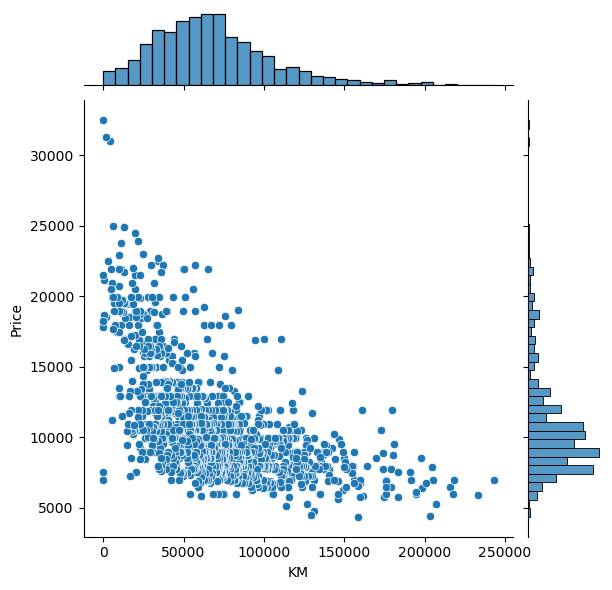

In [57]:
sn.jointplot(x = 'KM' , y = 'Price' , data = df)